# CATA (Customized Auto Trading Assistance) DEMO

## Import Packages

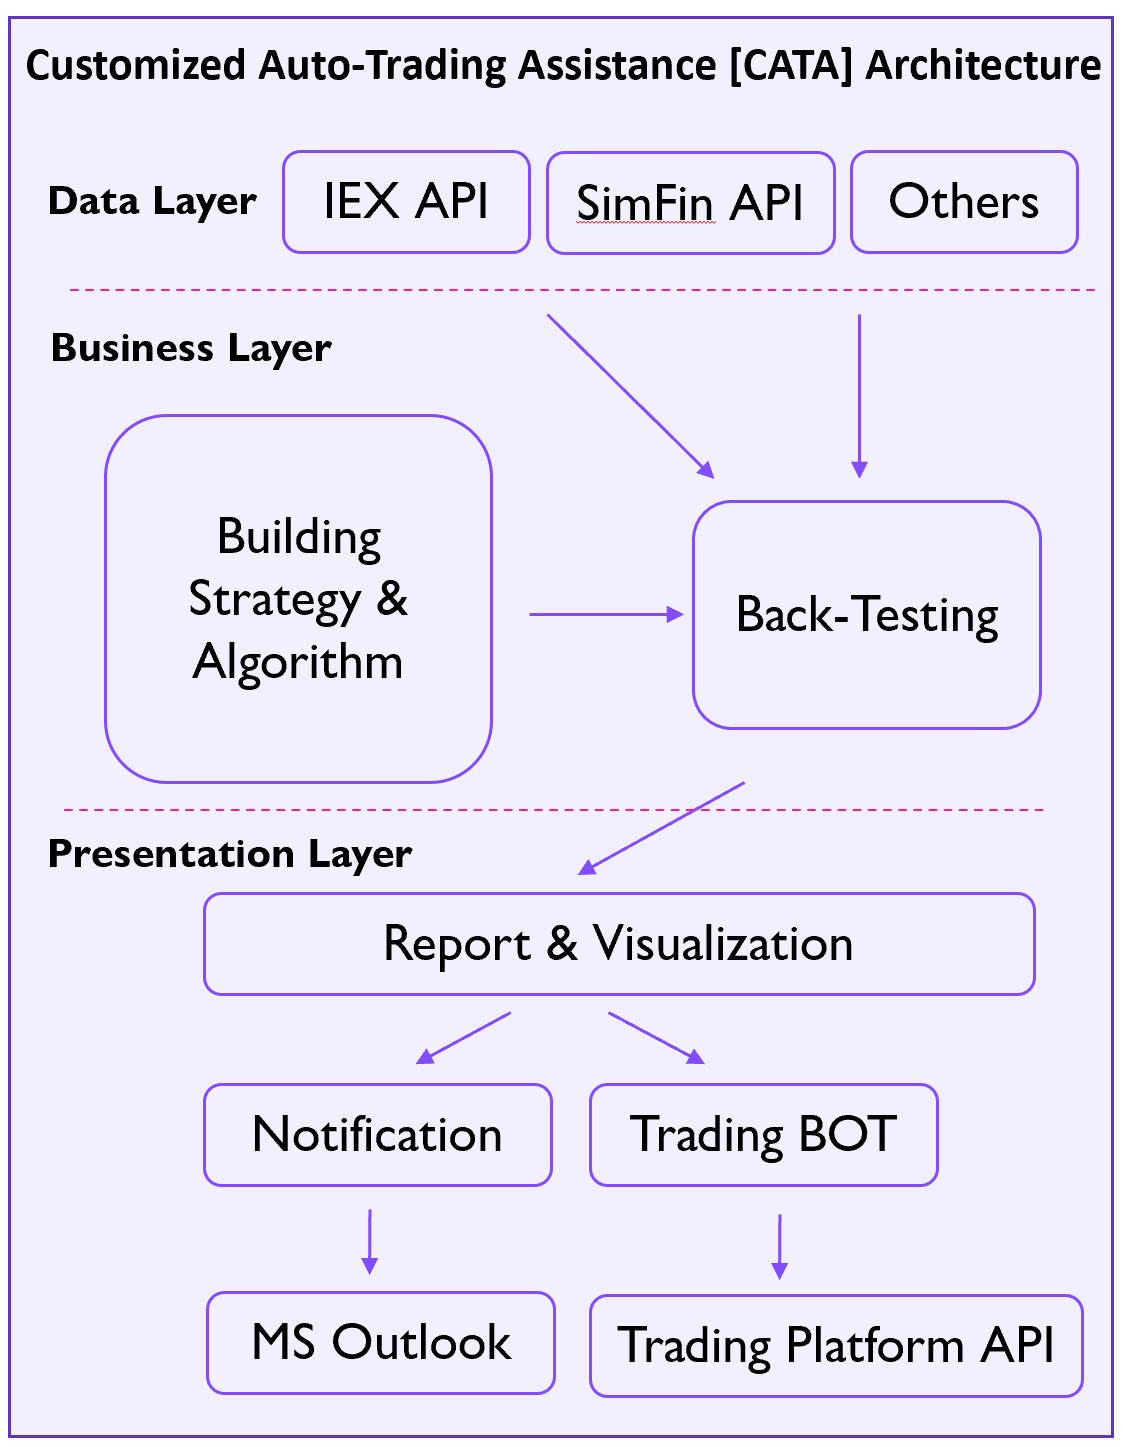

In [9]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\CATA_Architecture.png",
     width=800, height=200)

In [5]:
from data import DataAPI
from email_notification import Notification
from backtesting import Backtesting
from Visualization import Visualization
from strategy import Strategy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# Retrieve Data

## IEX Cloud

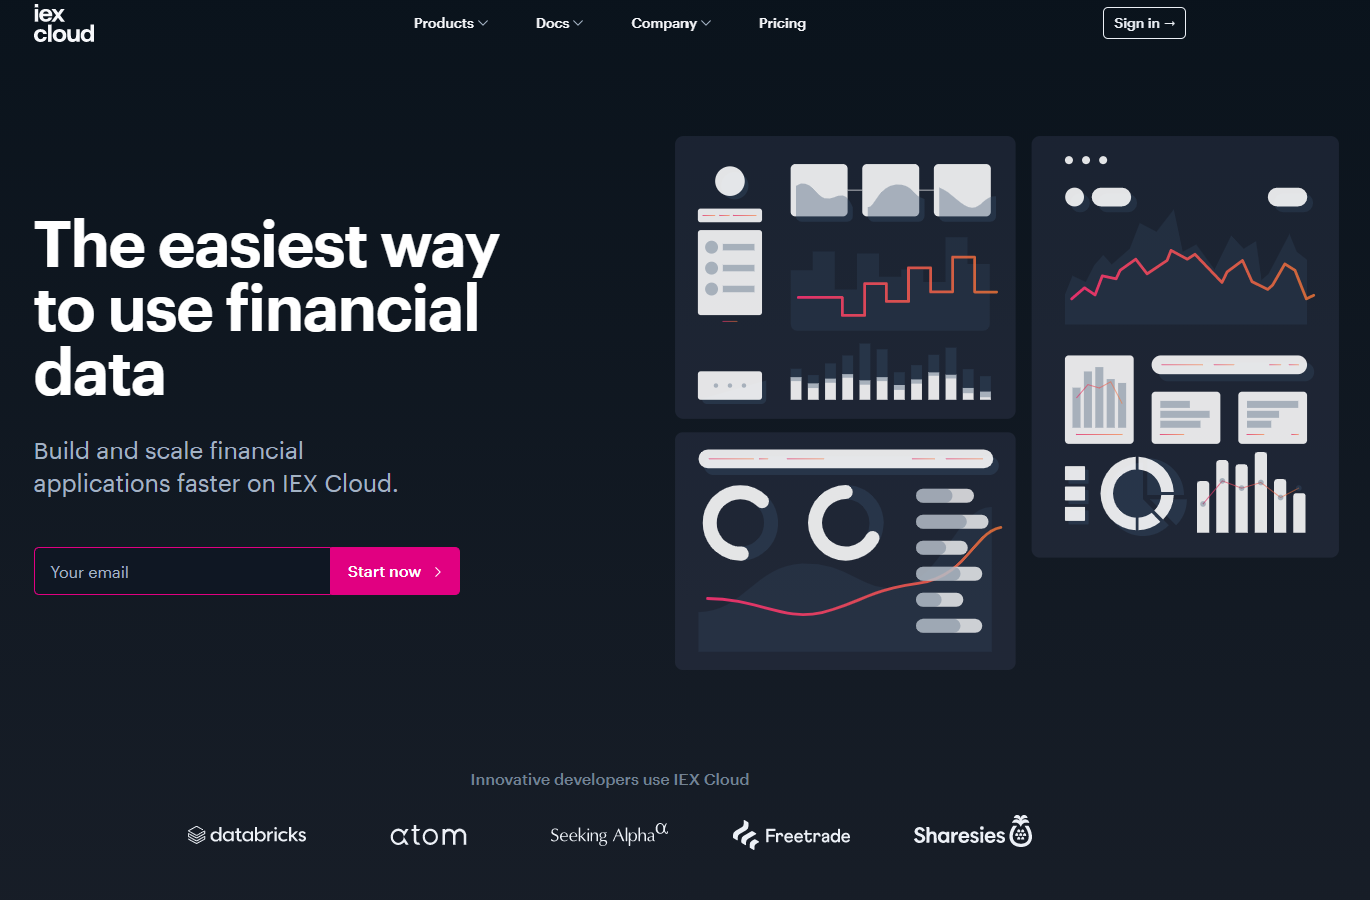

In [25]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\iex cloud.png",
     width=800, height=400)

In [10]:
iex_token_path = r"C:\Users\kbin5\OneDrive\Desktop\IEX_token.txt"
iex_token = open(iex_token_path, "r").read()

data = DataAPI(which_API = 'IEX', token = iex_token)

In [11]:
df = data.IEX_daily_pricing_data(sec_id = 'AAPL', duration = '1m')

In [12]:
df.tail()

,date,open,close,high,low,volume
18,2020-11-13,119.44,119.26,119.67,117.87,81688586
19,2020-11-16,118.92,120.30,120.99,118.15,91183018
20,2020-11-17,119.55,119.39,120.67,118.96,74270973
21,2020-11-18,118.61,118.03,119.82,118.00,76322111
22,2020-11-19,117.59,118.64,119.06,116.81,74112972


## Yahoo Finance

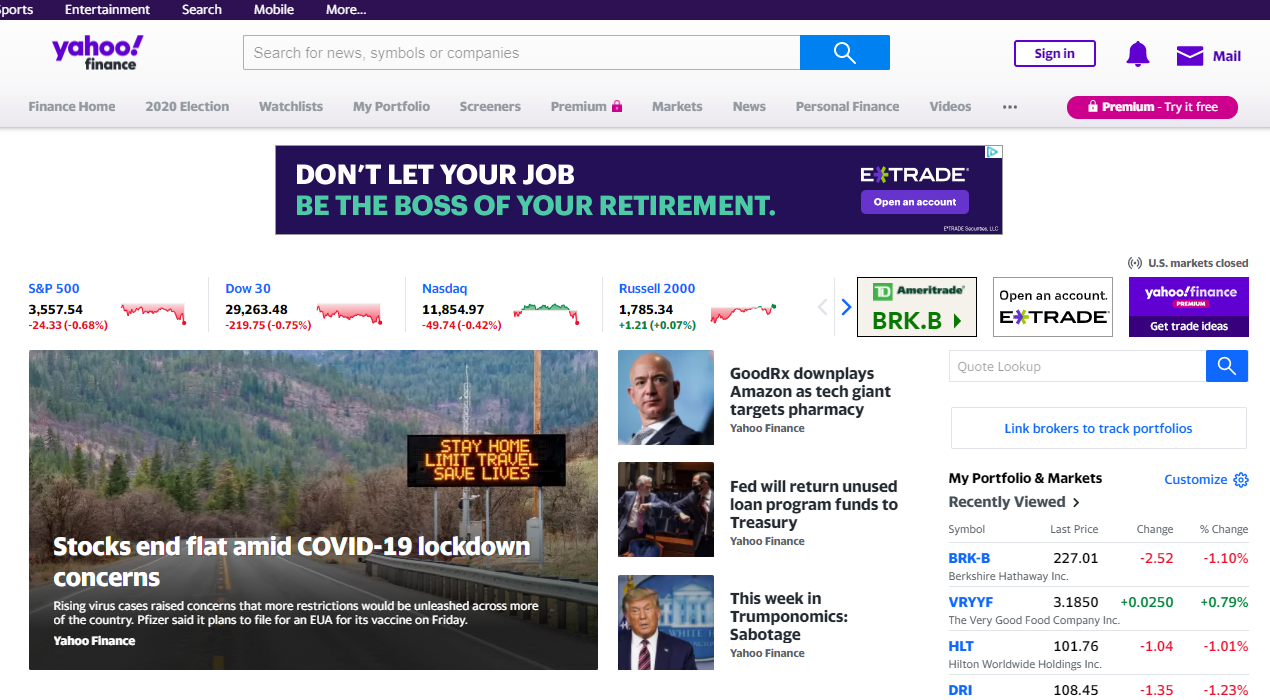

In [26]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\yahoofincance.png",
     width=800, height=400)

In [13]:
data = DataAPI(which_API = 'yahoo', token = None)

In [19]:
df = data.yahoo_pricing_data('AAPL', start_date= "2018-10-30", end_date='2020-11-15')
df.tail()

[*********************100%***********************]  1 of 1 completed


,date,open,close,high,low,volume
510,2020-11-09,120.500000,116.320000,121.989998,116.050003,154515300
511,2020-11-10,115.550003,115.970001,117.589996,114.129997,138023400
512,2020-11-11,117.190002,119.489998,119.629997,116.440002,112295000
513,2020-11-12,119.620003,119.209999,120.529999,118.570000,103162300
514,2020-11-13,119.440002,119.260002,119.669998,117.870003,81581900


(array([736968., 737060., 737150., 737241., 737333., 737425., 737516.,
        737607., 737699.]),
 <a list of 9 Text major ticklabel objects>)

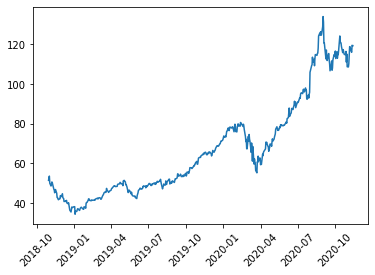

In [15]:
plt.plot(df['date'], df['close'])
plt.xticks(rotation=45)

## SimFin

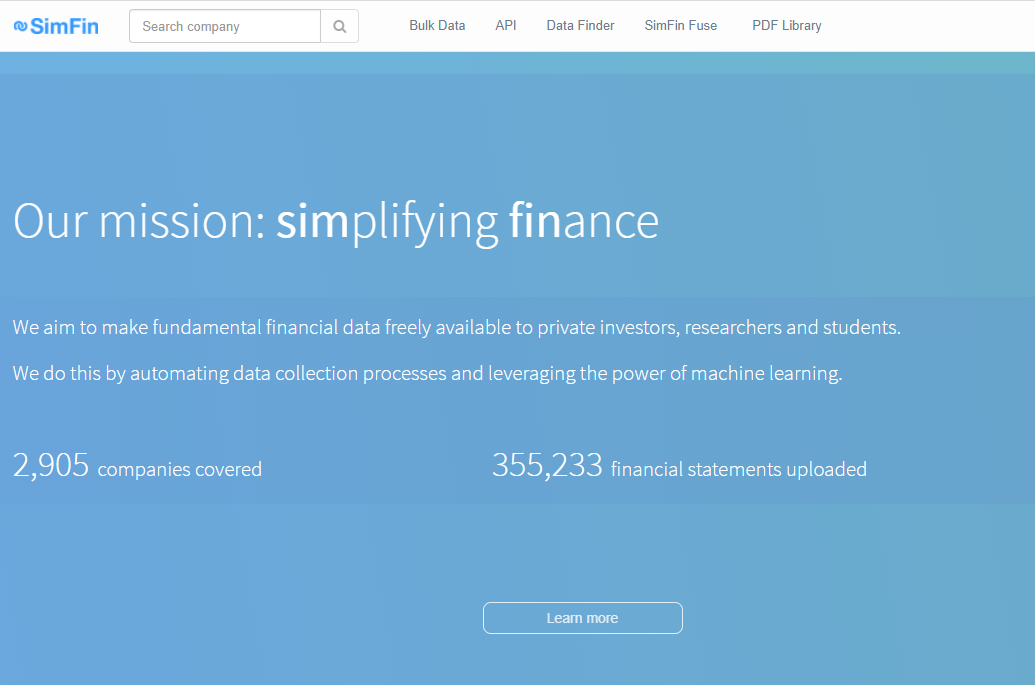

In [27]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\simfin.png",
     width=800, height=400)

### Daily Pricing Data

In [16]:
data = DataAPI(which_API = 'SimFin', token = None)

In [17]:
df = data.SF_pricing_data(sec_id = 'AAPL', period = 'Daily', market = 'us', start_date='2016-01-01', end_date = None)
df.tail()

Dataset "us-shareprices-daily" on disk (6 days old).
- Loading from disk ... Done!


,index,date,open,close,high,low,volume
1222,3488,2020-11-09,120.50,116.32,121.99,116.05,154515315
1223,3489,2020-11-10,115.55,115.97,117.59,114.13,138023390
1224,3490,2020-11-11,117.19,119.49,119.63,116.44,112294954
1225,3491,2020-11-12,119.62,119.21,120.53,118.57,103350674
1226,3492,2020-11-13,119.44,119.26,119.67,117.87,80893724


### Income Statement Data

In [47]:
df_income = data.SF_income_statement(sec_id = 'AAPL', period = 'annual', market = 'us')

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [48]:
df_income.tail()

,,SimFinId,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,Fiscal Period,,,,,,,,,,,,,,,,,,,,,
2016-09-30,FY,111052,USD,2016,2016-10-26,2018-11-05,2.188328e+10,2.200112e+10,2.156390e+11,-1.313760e+11,8.426300e+10,...,1.348000e+09,NaN,61372000000,NaN,61372000000,-1.568500e+10,45687000000,NaN,45687000000,45687000000
2017-09-30,FY,111052,USD,2017,2017-11-02,2019-10-31,2.086897e+10,2.100677e+10,2.292340e+11,-1.410480e+11,8.818600e+10,...,2.745000e+09,NaN,64089000000,NaN,64089000000,-1.573800e+10,48351000000,NaN,48351000000,48351000000
2018-09-30,FY,111052,USD,2018,2018-10-30,2019-10-31,1.982151e+10,2.000044e+10,2.655950e+11,-1.637560e+11,1.018390e+11,...,2.005000e+09,NaN,72903000000,NaN,72903000000,-1.337200e+10,59531000000,NaN,59531000000,59531000000
2019-09-30,FY,111052,USD,2019,2019-10-29,2019-10-31,1.847134e+10,1.859565e+10,2.601740e+11,-1.617820e+11,9.839200e+10,...,1.807000e+09,NaN,65737000000,NaN,65737000000,-1.048100e+10,55256000000,NaN,55256000000,55256000000
2020-09-30,FY,111052,USD,2020,2020-10-30,2020-10-30,1.735212e+10,1.752821e+10,2.745150e+11,-1.695590e+11,1.049560e+11,...,8.030000e+08,NaN,67091000000,NaN,67091000000,-9.680000e+09,57411000000,NaN,57411000000,57411000000


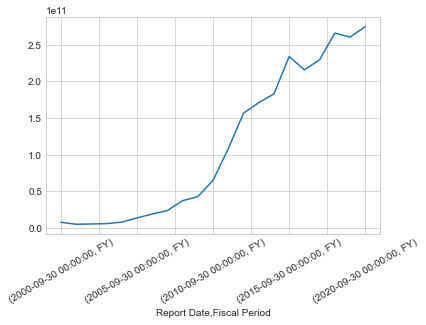

In [56]:
df_income['Revenue'].plot(grid=True, rot = 30)

### Balance Sheet Data

In [31]:
df_bs = data.SF_balance_sheet(sec_id = 'AAPL', period = 'quarterly', market = 'us')

Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!


In [32]:
df_bs.tail()

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2018-09-30,111052,USD,2018,Q4,2018-10-30,2019-10-31,1.920635e+10,1.939019e+10,6.630100e+10,2.318600e+10,...,2.074800e+10,1.159290e+11,9.373500e+10,1.426490e+11,258578000000,4.020100e+10,NaN,7.040000e+10,1.071470e+11,365725000000
2018-12-31,111052,USD,2019,Q1,2019-01-29,2019-01-30,1.894328e+10,1.909301e+10,8.642700e+10,1.807700e+10,...,2.174100e+10,1.082830e+11,9.298900e+10,1.475440e+11,255827000000,4.097000e+10,NaN,8.051000e+10,1.178920e+11,373719000000
2019-03-31,111052,USD,2019,Q2,2019-05-01,2019-05-01,1.869628e+10,1.880258e+10,8.009200e+10,1.508500e+10,...,2.242900e+10,9.377200e+10,9.020100e+10,1.423660e+11,236138000000,4.280100e+10,NaN,6.455800e+10,1.058600e+11,341998000000
2019-06-30,111052,USD,2019,Q3,2019-07-31,2019-07-31,1.828253e+10,1.840552e+10,9.461400e+10,1.414800e+10,...,2.348200e+10,8.970400e+10,8.493600e+10,1.360790e+11,225783000000,4.337100e+10,NaN,5.372400e+10,9.645600e+10,322239000000
2019-09-30,111052,USD,2019,Q4,2019-10-29,2020-07-31,1.796325e+10,1.808150e+10,1.005570e+11,2.292600e+10,...,1.624000e+10,1.057180e+11,9.180700e+10,1.423100e+11,248028000000,4.517400e+10,NaN,4.589800e+10,9.048800e+10,338516000000


#### Calculate Leverage

In [60]:
df_bs['Leverage'] = df_bs['Total Assets']/df_bs['Total Liabilities']

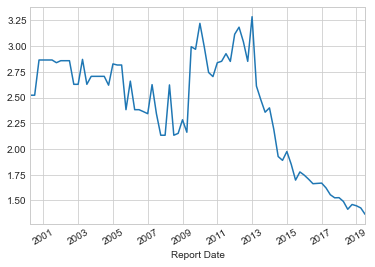

In [61]:
df_bs['Leverage'].plot(grid=True, rot = 30)

### Cashflow Statement Data

In [63]:
df_cf = data.SF_cashflow_statment(sec_id = 'AAPL', period = 'annual', market = 'us')

Dataset "us-cashflow-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [64]:
df_cf.tail()

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Net Income/Starting Line,Depreciation & Amortization,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
Report Date,,,,,,,,,,,,,,,,,,,,,
2015-09-30,111052,USD,2015,FY,2015-10-27,2017-11-03,2.301368e+10,2.317228e+10,5.339400e+10,1.125700e+10,...,81266000000,-1.148800e+10,-4.441700e+10,-343000000.0,-5.627400e+10,-1.156100e+10,2.930500e+10,-3.471000e+10,-1.771600e+10,7276000000
2016-09-30,111052,USD,2016,FY,2016-10-26,2018-11-05,2.188328e+10,2.200112e+10,4.568700e+10,1.050500e+10,...,66231000000,-1.273400e+10,-3.202200e+10,-297000000.0,-4.597700e+10,-1.215000e+10,2.205700e+10,-2.922700e+10,-2.089000e+10,-636000000
2017-09-30,111052,USD,2017,FY,2017-11-02,2019-10-31,2.086897e+10,2.100677e+10,4.835100e+10,1.015700e+10,...,64225000000,-1.245100e+10,-3.354200e+10,-329000000.0,-4.644600e+10,-1.276900e+10,2.901400e+10,-3.234500e+10,-1.797400e+10,-195000000
2018-09-30,111052,USD,2018,FY,2018-10-30,2019-10-31,1.982151e+10,2.000044e+10,5.953100e+10,1.090300e+10,...,77434000000,-1.331300e+10,3.084500e+10,-721000000.0,1.606600e+10,-1.371200e+10,4.320000e+08,-7.206900e+10,-8.787600e+10,5624000000
2019-09-30,111052,USD,2019,FY,2019-10-29,2019-10-31,1.847134e+10,1.859565e+10,5.525600e+10,1.254700e+10,...,69391000000,-1.049500e+10,5.809300e+10,-624000000.0,4.589600e+10,-1.411900e+10,-7.819000e+09,-6.611600e+10,-9.097600e+10,24311000000


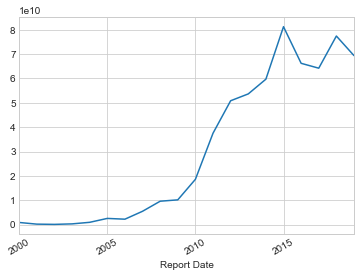

In [65]:
df_cf['Net Cash from Operating Activities'].plot(grid=True, rot = 30)

# Back-testing

### SMA - simple moving average

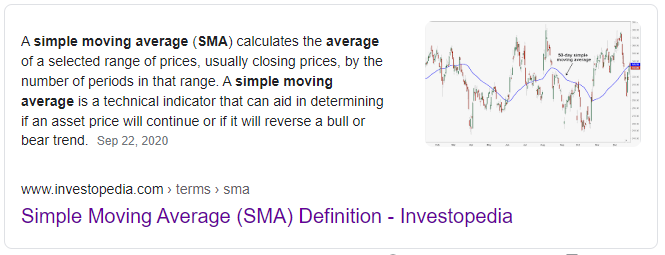

In [33]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\sma.png",
     width=800, height=400)

Back-testing result:
	sma_short:8, sma_long:30
Strategy gain in this back-test is 2.55
Stock gain in this back-test is 2.32


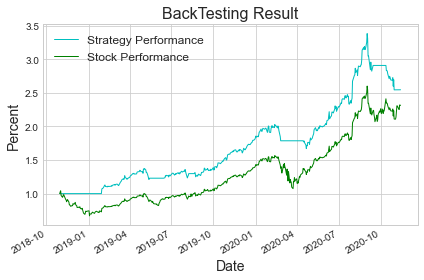

In [20]:
# Create an instance of Backtesting

backtest = Backtesting(df)

# call SMA_single_stock function to test SMA strategy
sma_df = backtest.SMA_single_parameter(sma_short=8, sma_long=30)

# Craeta an instance of visualization
Visual_sma_bt = Visualization(sma_df)

# Plot backtesting result
Visual_sma_bt.sma_plot_result()

In [23]:
# Test bulk parameters 

sma_short = [7, 15, 20]
sma_long = [35, 60, 90]

sma_bulk = backtest.SMA_bulk_parameters(sma_short=sma_short, sma_long=sma_long)
sma_bulk

,Back-testing Index,sma_short,sma_long,stock_gain,strategy_gain,diff
0,1.0,7.0,35.0,2.316483,2.474748,0.158265
1,2.0,7.0,60.0,2.316483,2.337093,0.020610
2,3.0,7.0,90.0,2.316483,2.171619,-0.144863
3,4.0,15.0,35.0,2.316483,2.564854,0.248372
4,5.0,15.0,60.0,2.316483,2.301781,-0.014702
5,6.0,15.0,90.0,2.316483,1.924023,-0.392460
6,7.0,20.0,35.0,2.316483,2.419396,0.102913
7,8.0,20.0,60.0,2.316483,2.244100,-0.072383
8,9.0,20.0,90.0,2.316483,1.921406,-0.395076


Back-testing result:
	sma_short:15, sma_long:35
Strategy gain in this back-test is 2.56
Stock gain in this back-test is 2.32


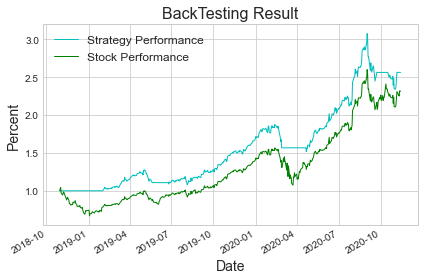

In [24]:
# call SMA_single_stock function to test SMA strategy
sma_better_param = backtest.SMA_single_parameter(sma_short=15, sma_long=35)

# Craeta an instance of visualization
Visual_sma_bt = Visualization(sma_better_param)

# Plot backtesting result
Visual_sma_bt.sma_plot_result()

## RSI - relative strength index

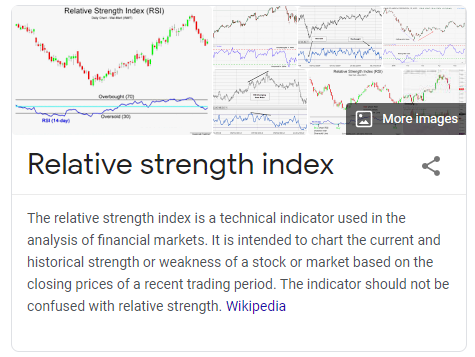

In [34]:
Image(filename="D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\RSI.png",
     width=800, height=400)

Back-testing result:
period:25
Strategy gain in this back-test is 1.41
Stock gain in this back-test is 2.32


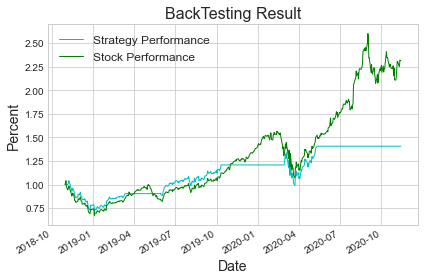

In [25]:
# Create an instance of Backtesting

backtest = Backtesting(df)

# call SMA_single_stock function to test SMA strategy
rsi_df = backtest.RSI_single_parameter(period = 25)

# Craeta an instance of visualization
Visual_rsi_bt = Visualization(rsi_df)

# Plot backtesting result
Visual_rsi_bt.sma_plot_result()

## Bollinger Bands

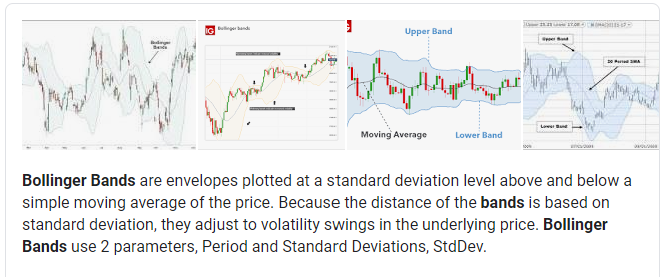

In [35]:
Image(filename=r"D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\Final Project\bb.png")

Back-testing result:
	sma_period:30, std_period:20
Strategy gain in this back-test is 1.26
Stock gain in this back-test is 2.32


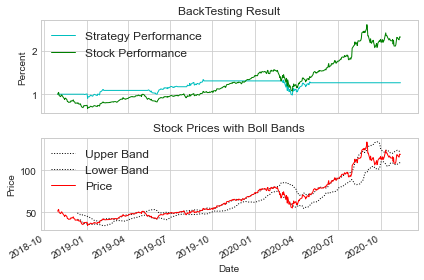

In [31]:
# Create an instance of Backtesting

backtest = Backtesting(df)

# call SMA_single_stock function to test SMA strategy
rsi_df = backtest.Bollinger_single_parameter()

# Craeta an instance of visualization
Visual_rsi_bt = Visualization(rsi_df)


# Plot backtesting result
Visual_rsi_bt.boll_plot_result()

# Trading BOT

In [40]:
email_add_path = r"C:\Users\kbin5\OneDrive\Desktop\email_add.txt"
email_pwd_path = r"C:\Users\kbin5\OneDrive\Desktop\email_pwd.txt"

In [41]:
email_add = open(email_add_path, "r").read()
email_pwd = open(email_pwd_path, "r").read()
bot = Strategy(email_add = email_add, email_pwd = email_pwd)

In [42]:
bot.test_Implement_SMA(sec_id = 'AAPL', qty = 10, sma_short = 15, sma_long = 35)

[*********************100%***********************]  1 of 1 completed
Back-testing result:
	sma_short:15, sma_long:35
Strategy gain in this back-test is 2.56
Stock gain in this back-test is 2.28
signal: buy
OpenOrder. ID: 10 AAPL STK @ SMART : BUY MKT 10.0 PreSubmitted
OrderStatus. Id:  10 , Status:  PreSubmitted , Filled:  0.0 , Remaining:  10.0 , LastFillPrice:  0.0
Error:  -1   2104   Market data farm connection is OK:usfarm.nj
Error:  -1   2104   Market data farm connection is OK:cashfarm
Error:  -1   2104   Market data farm connection is OK:usfarm
Error:  -1   2106   HMDS data farm connection is OK:ushmds
Error:  -1   2158   Sec-def data farm connection is OK:secdefil
Error:  12   399   Order Message:
BUY 10 AAPL NASDAQ.NMS
OpenOrder. ID: 12 AAPL STK @ SMART : BUY MKT 10.0 PreSubmitted
OrderStatus. Id:  12 , Status:  PreSubmitted , Filled:  0.0 , Remaining:  10.0 , LastFillPrice:  0.0


unhandled exception in EReader thread
Traceback (most recent call last):
  File "D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\CATA\venv\Lib\site-packages\ibapi\reader.py", line 34, in run
    data = self.conn.recvMsg()
  File "D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\CATA\venv\Lib\site-packages\ibapi\connection.py", line 99, in recvMsg
    buf = self._recvAllMsg()
  File "D:\K\HU\HU - Courses\CISC 695 Research Methodology and Writing\Assignments\CATA\venv\Lib\site-packages\ibapi\connection.py", line 119, in _recvAllMsg
    buf = self.socket.recv(4096)
OSError: [WinError 10038] An operation was attempted on something that is not a socket


# THANKG YOU